In [58]:
import pandas as pd
file_path = "./ref/청소년정신건강_20250304.csv"
ori = pd.read_csv(file_path)
ori.head()

,시점,스트레스 인지율,스트레스 인지율.1,스트레스 인지율.2,우울감 경험률,우울감 경험률.1,우울감 경험률.2,자살 생각률,자살 생각률.1,자살 생각률.2
0,시점,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2024,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4


In [37]:
# ori_slc = ori.iloc[1:,:]
# # ori_slc
# ori_slc = pd.DataFrame(ori_slc, dtype = "float")
# ori_slc
# # ori.iloc[2] = 100 - ori.iloc[1]

In [60]:
# 컬럼명 지정
new_name = ["시점", "스트레스", "스트레스남학생", "스트레스여학생", "우울감경험률", "우울남학생", "우울여학생", "자살생각률", "자살남학생", "자살여학생"]
ori.columns = new_name
ori

,시점,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생
0,시점,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2024,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4


In [61]:
# 시점을 없애고, 0번 행도 없앰
ori = ori.loc[1:, "스트레스":]
ori

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생
1,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4


In [62]:
# 2번 인덱스 행을 생성, 100에서 값을 뺀 값
ori.loc[2] = 100 - ori.loc[1,"스트레스":].astype(float)
# 마지막에 응답 컬럼 생성 (그렇다 / 아니다)
ori["응답"] = ["그렇다", "아니다"]
ori

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생,응답
1,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4,그렇다
2,54.7,60.4,48.7,71.8,76.1,67.4,85.8,88.9,82.6,아니다


In [63]:
ori = ori.set_index("응답")
ori

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생
응답,,,,,,,,,
그렇다,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4
아니다,54.7,60.4,48.7,71.8,76.1,67.4,85.8,88.9,82.6


In [2]:
# os에 있는 사용가능한 폰트 나열
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
fontlist

['C:\\Windows\\Fonts\\seguibli.ttf',
 'C:\\Windows\\Fonts\\ARLRDBD.TTF',
 'C:\\Windows\\Fonts\\micross.ttf',
 'C:\\Windows\\Fonts\\WINGDNG3.TTF',
 'C:\\Windows\\Fonts\\FORTE.TTF',
 'C:\\Windows\\Fonts\\lucon.ttf',
 'C:\\Windows\\Fonts\\HancomHoonminjeongeumH.ttf',
 'C:\\Windows\\Fonts\\BOOKOSI.TTF',
 'C:\\Windows\\Fonts\\OLDENGL.TTF',
 'C:\\Windows\\Fonts\\msjh.ttc',
 'C:\\Windows\\Fonts\\POORICH.TTF',
 'C:\\Windows\\Fonts\\segoeuii.ttf',
 'C:\\Windows\\Fonts\\framdit.ttf',
 'C:\\Windows\\Fonts\\ANTQUAB.TTF',
 'C:\\Windows\\Fonts\\ROCK.TTF',
 'C:\\Windows\\Fonts\\LeelUIsl.ttf',
 'C:\\Windows\\Fonts\\SCHLBKI.TTF',
 'C:\\Windows\\Fonts\\mmrtext.ttf',
 'C:\\Windows\\Fonts\\LBRITE.TTF',
 'C:\\Windows\\Fonts\\wingding.ttf',
 'C:\\Windows\\Fonts\\Candarali.ttf',
 'C:\\Windows\\Fonts\\BRUSHSCI.TTF',
 'C:\\Windows\\Fonts\\FRADMCN.TTF',
 'C:\\Windows\\Fonts\\malgun.ttf',
 'C:\\Windows\\Fonts\\Candaraz.ttf',
 'C:\\Windows\\Fonts\\HANBatangExt.ttf',
 'C:\\Windows\\Fonts\\msyhbd.ttc',
 'C:\\Window

Text(0.2, 0.4, '한글')

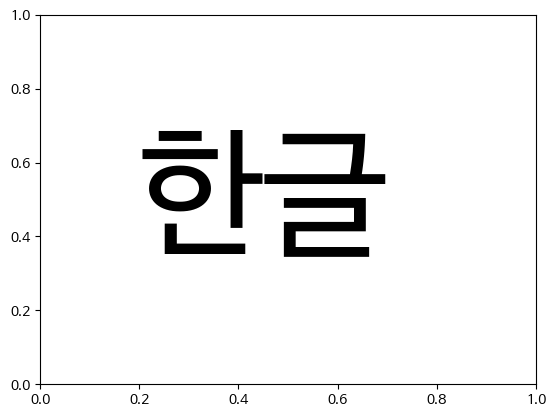

In [6]:
# path = "C:\\Windows\\Fonts\\NanumGothicLight.otf"
# font_name = fm.FontProperties(fname = path).get_name()
# rc("font", family = font_name)
# 리눅스용 폰트 경로 설정
plt.rc('font', family="NanumBarunGothic")
plt.text(0.2, 0.4, "한글", size=100)

<Axes: ylabel='스트레스'>

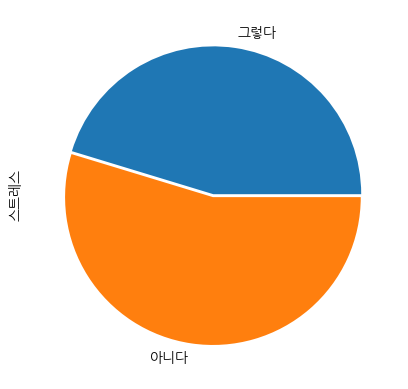

In [66]:
ori["스트레스"].astype(float).plot.pie(explode = [0, 0.02])

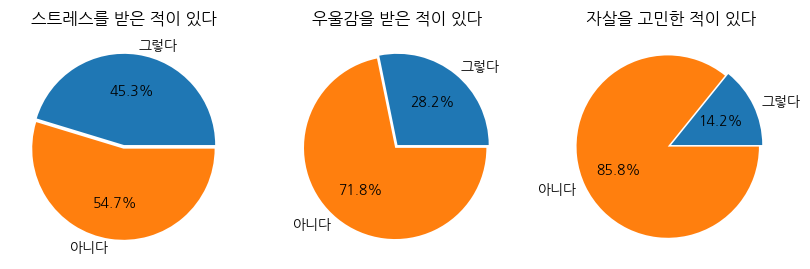

In [67]:
fig, ax = plt.subplots(1,3,figsize=(10,8))
ori["스트레스"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[0], autopct = "%.1f%%")
ax[0].set_title("스트레스를 받은 적이 있다")
ax[0].set_ylabel("")

ori["우울감경험률"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[1], autopct = "%.1f%%")
ax[1].set_title("우울감을 받은 적이 있다")
ax[1].set_ylabel("")

ori["자살생각률"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[2], autopct = "%.1f%%")
ax[2].set_title("자살을 고민한 적이 있다")
ax[2].set_ylabel("")

plt.show()

In [78]:
import pandas as pd
file_path = "./ref/청소년정신건강_20232022.csv"
ori_23 = pd.read_csv(file_path)
ori_23.head()

,시점,스트레스 인지율,스트레스 인지율.1,스트레스 인지율.2,우울감 경험률,우울감 경험률.1,우울감 경험률.2,자살 생각률,자살 생각률.1,자살 생각률.2
0,시점,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2022,43.5,38.8,48.6,30.2,25.5,35.1,15.8,11.9,19.9
2,2023,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9


In [79]:
# 컬럼명 지정
new_name = ["시점", "스트레스", "스트레스남학생", "스트레스여학생", "우울감경험률", "우울남학생", "우울여학생", "자살생각률", "자살남학생", "자살여학생"]
ori_23.columns = new_name
ori_23

,시점,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생
0,시점,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2022,43.5,38.8,48.6,30.2,25.5,35.1,15.8,11.9,19.9
2,2023,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9


In [80]:
# 시점을 없애고, 0번 행도 없앰
ori_23 = ori_23.loc[1:, "스트레스":]
ori_23

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생
1,43.5,38.8,48.6,30.2,25.5,35.1,15.8,11.9,19.9
2,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9


In [88]:
ori_22 = ori_23.loc[:1,:]
ori_23 = ori_23.loc[2:,:]
# ori_23.drop(ori_23.iloc[0], axis=0)
ori_23

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생
2,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9


In [89]:
# 2번 인덱스 행을 생성, 100에서 값을 뺀 값
ori_22.loc[2] = 100 - ori_22.loc[1,"스트레스":].astype(float)
# 마지막에 응답 컬럼 생성 (그렇다 / 아니다)
ori_22["응답"] = ["그렇다", "아니다"]
ori_22

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생,응답
1,43.5,38.8,48.6,30.2,25.5,35.1,15.8,11.9,19.9,그렇다
2,56.5,61.2,51.4,69.8,74.5,64.9,84.2,88.1,80.1,아니다


In [94]:
ori_22 = ori_22.set_index("응답")
ori_22

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생
응답,,,,,,,,,
그렇다,43.5,38.8,48.6,30.2,25.5,35.1,15.8,11.9,19.9
아니다,56.5,61.2,51.4,69.8,74.5,64.9,84.2,88.1,80.1


In [90]:
# 2번 인덱스 행을 생성, 100에서 값을 뺀 값
ori_23.loc[3] = 100 - ori_23.loc[2,"스트레스":].astype(float)
# 마지막에 응답 컬럼 생성 (그렇다 / 아니다)
ori_23["응답"] = ["그렇다", "아니다"]
ori_23

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생,응답
2,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9,그렇다
3,60.4,66.6,53.8,72.5,76.7,68.0,85.5,89.5,81.1,아니다


In [95]:
ori_23 = ori_23.set_index("응답")
ori_23

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생
응답,,,,,,,,,
그렇다,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9
아니다,60.4,66.6,53.8,72.5,76.7,68.0,85.5,89.5,81.1


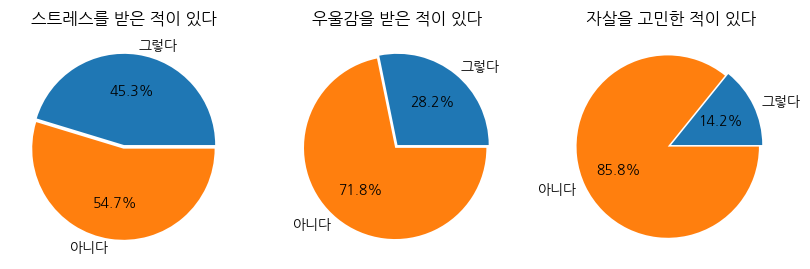

In [97]:
fig, ax = plt.subplots(1,3,figsize=(10,8))

ori["스트레스"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[0], autopct = "%.1f%%")
ax[0].set_title("스트레스를 받은 적이 있다")
ax[0].set_ylabel("")

ori["우울감경험률"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[1], autopct = "%.1f%%")
ax[1].set_title("우울감을 받은 적이 있다")
ax[1].set_ylabel("")

ori["자살생각률"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[2], autopct = "%.1f%%")
ax[2].set_title("자살을 고민한 적이 있다")
ax[2].set_ylabel("")

plt.show()

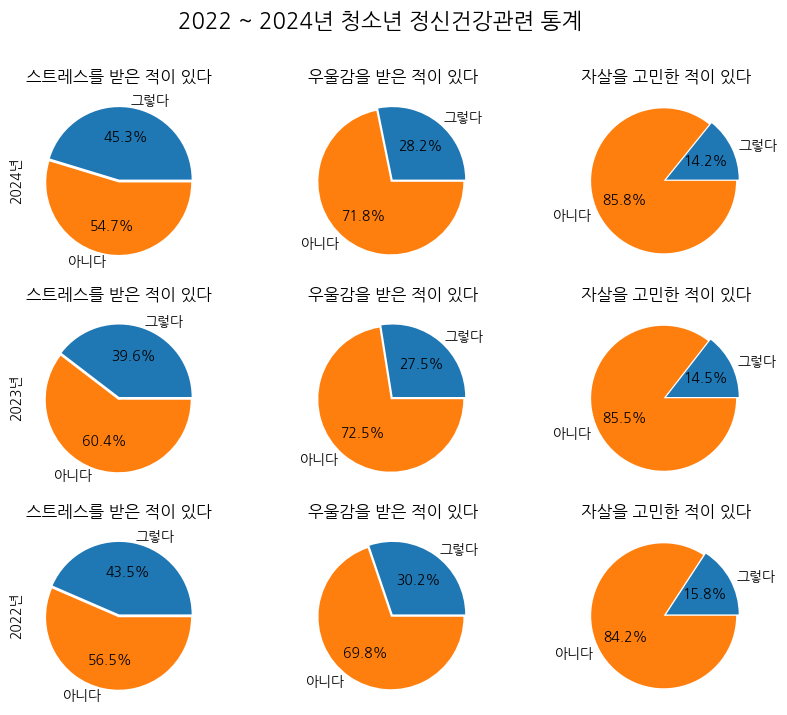

In [109]:
fig, ax = plt.subplots(3,3,figsize=(10,8))

ori["스트레스"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[0][0], autopct = "%.1f%%")
ax[0][0].set_title("스트레스를 받은 적이 있다")
ax[0][0].set_ylabel("2024년")

ori["우울감경험률"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[0][1], autopct = "%.1f%%")
ax[0][1].set_title("우울감을 받은 적이 있다")
ax[0][1].set_ylabel("")

ori["자살생각률"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[0][2], autopct = "%.1f%%")
ax[0][2].set_title("자살을 고민한 적이 있다")
ax[0][2].set_ylabel("")

ori_23["스트레스"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[1][0], autopct = "%.1f%%")
ax[1][0].set_title("스트레스를 받은 적이 있다")
ax[1][0].set_ylabel("2023년")

ori_23["우울감경험률"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[1][1], autopct = "%.1f%%")
ax[1][1].set_title("우울감을 받은 적이 있다")
ax[1][1].set_ylabel("")

ori_23["자살생각률"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[1][2], autopct = "%.1f%%")
ax[1][2].set_title("자살을 고민한 적이 있다")
ax[1][2].set_ylabel("")

ori_22["스트레스"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[2][0], autopct = "%.1f%%")
ax[2][0].set_title("스트레스를 받은 적이 있다")
ax[2][0].set_ylabel("2022년")

ori_22["우울감경험률"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[2][1], autopct = "%.1f%%")
ax[2][1].set_title("우울감을 받은 적이 있다")
ax[2][1].set_ylabel("")

ori_22["자살생각률"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[2][2], autopct = "%.1f%%")
ax[2][2].set_title("자살을 고민한 적이 있다")
ax[2][2].set_ylabel("")

plt.suptitle("2022 ~ 2024년 청소년 정신건강관련 통계", fontsize = 16)
plt.show()

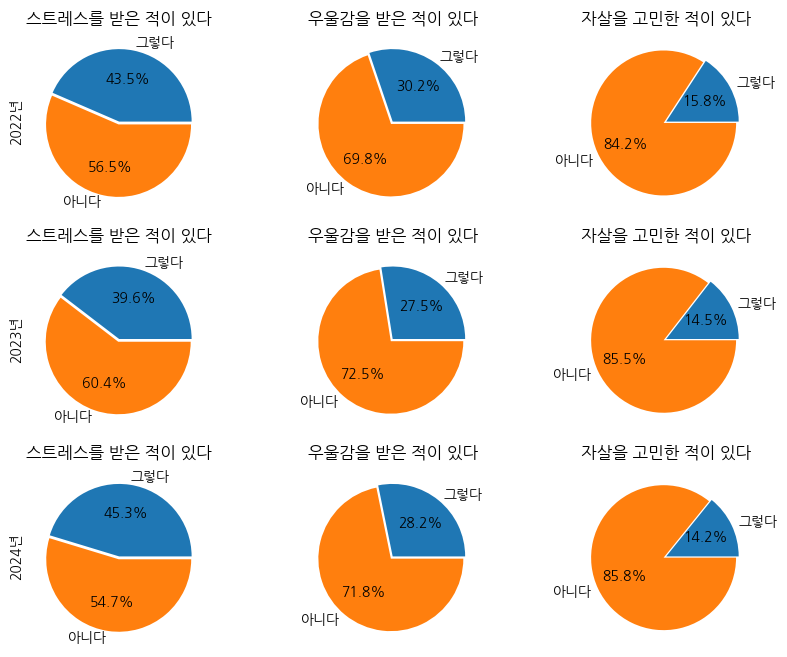

In [112]:
fig, ax = plt.subplots(3,3,figsize=(10,8))
for i in range(0,3):
    if i == 0:
        df = ori_22
    elif i == 1:
        df = ori_23
    elif i == 2:
        df = ori
        
    df["스트레스"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[i][0], autopct = "%.1f%%")
    ax[i][0].set_title("스트레스를 받은 적이 있다")
    ax[i][0].set_ylabel(f"202{i+2}년")
    
    df["우울감경험률"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[i][1], autopct = "%.1f%%")
    ax[i][1].set_title("우울감을 받은 적이 있다")
    ax[i][1].set_ylabel("")
    
    df["자살생각률"].astype(float).plot.pie(explode = [0, 0.04], ax = ax[i][2], autopct = "%.1f%%")
    ax[i][2].set_title("자살을 고민한 적이 있다")
    ax[i][2].set_ylabel("")